In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()                 
%matplotlib inline     
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster

<Figure size 1280x720 with 0 Axes>

<Figure size 1280x720 with 0 Axes>

In [2]:
#reading the Airbnb Data into a Data Frame and removing NaN
df = pd.read_csv("AirBnB_San_Fransico_California_Listings.csv") 
df = df.dropna() 
df.count()

id                                2872
name                              2872
host_id                           2872
host_name                         2872
neighbourhood                     2872
latitude                          2872
longitude                         2872
room_type                         2872
price                             2872
minimum_nights                    2872
number_of_reviews                 2872
last_review                       2872
reviews_per_month                 2872
calculated_host_listings_count    2872
availability_365                  2872
dtype: int64

Text(0.5, 1.0, 'Number of listings/neighbourhood')

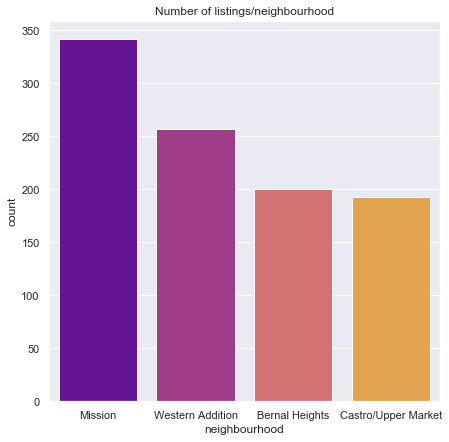

In [3]:
sns.countplot(df['neighbourhood'], palette="plasma", order=df.neighbourhood.value_counts().iloc[:4].index)
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.title('Number of listings/neighbourhood')

In [4]:
neighbourhood_price = df.groupby('neighbourhood').median()['price']
neighbourhood_price = pd.DataFrame({'neighbourhood':neighbourhood_price.index, 'price': neighbourhood_price.T.values})
neighbourhood_price.sort_values('price', ascending=False, inplace=True)
neighbourhood_price.head()

,neighbourhood,price
4,Cow Hollow,325.0
30,Presidio Heights,279.0
25,Pacific Heights,210.0
6,Diamond Heights,206.5
16,Marina,203.0


In [11]:
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[37.7749,-122.4194], zoom_start=12.0)
FastMarkerCluster(data=locations).add_to(map1)
map1

(0, 2000)

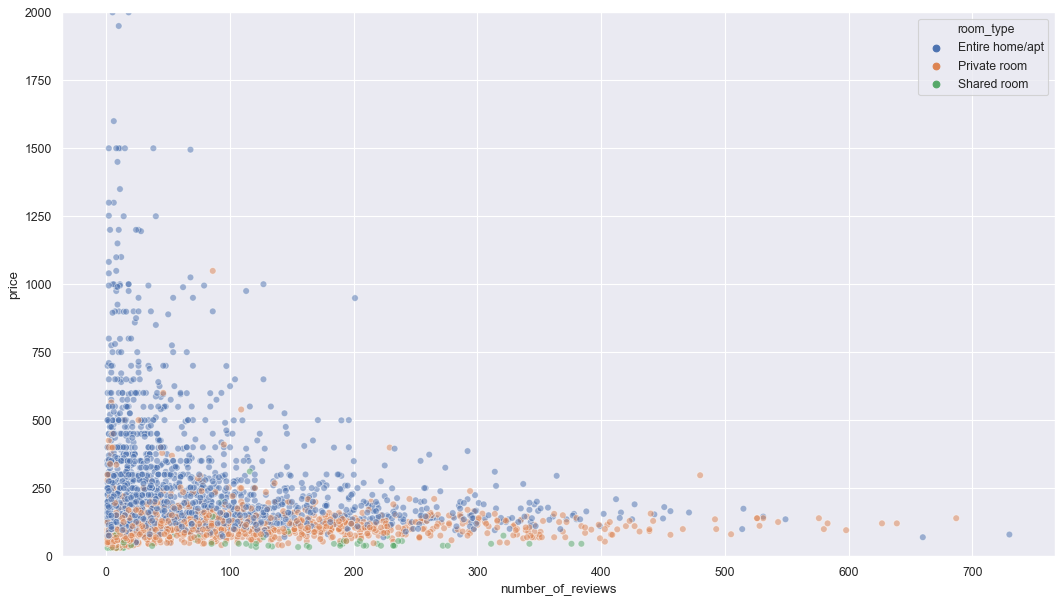

In [12]:
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(x='number_of_reviews',y='price',data=df,alpha=0.5,\
                hue='room_type',\
                #palette=cmap,\
                legend="full")

plt.ylim(0, 2000)

In [18]:
    price_from=100                       #Define Price Starting Range
    price_to=450                        #Define Price Ending Range
    visiting_neighbourhood="Mission"     #Define Neighbourhood visiting
    roomtype="Private room"             
    
df1=df.loc[((df['price']>=price_from) & (df['price']<=price_to) &
        (df['neighbourhood'].str.contains(visiting_neighbourhood)) &
       (df['number_of_reviews']>df['number_of_reviews'].mean())&
            ( (df['room_type'].str.contains(roomtype)))
       )
        ]

lats1 = df1['latitude'].tolist()
lons1 = df1['longitude'].tolist()
locations = list(zip(lats1, lons1))

map2 = folium.Map(location=[37.7749,-122.4194], zoom_start=13.0)
FastMarkerCluster(data=locations).add_to(map2)
map2

(0, 2000)

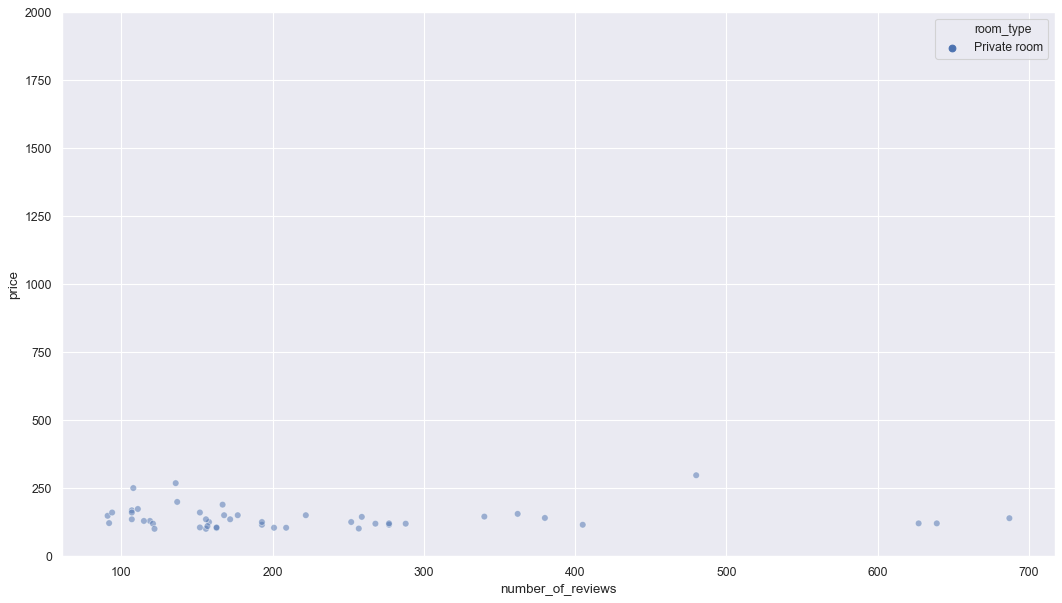

In [6]:
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(x='number_of_reviews',y='price',data=df1,alpha=0.5,\
                hue='room_type',\
                #palette=cmap,\
                legend="full")

plt.ylim(0, 2000)

In [10]:
df1.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7,8739,"""Mission Sunshine, with Private Bath""",7149.0,Ivan & Wendy,Mission,37.75919,-122.42237,Private room,139.0,1,687,7/28/19,5.63,2,118
188,225205,Private Mission Room Near Valencia,1172942.0,Chris,Mission,37.76097,-122.42313,Private room,115.0,2,405,6/30/19,4.23,1,0
307,470686,Private bath/Queen bdrm/Super Location,2335495.0,Hao,Mission,37.76731,-122.42542,Private room,125.0,1,252,7/27/19,2.90,1,19
353,562311,Stylish One or Two Bedrooms with Private Decks...,2694430.0,Angie,Mission,37.76149,-122.40874,Private room,103.0,7,163,7/12/19,1.88,2,83
435,748222,Sunny Room Heart of the Mission!,516404.0,Michael And Yesica,Mission,37.75621,-122.41555,Private room,120.0,1,627,7/31/19,7.65,2,296
